# Razlikovanje jezika (srpski - engleski)

Pretopostavka je da se može razlikovati između srpskog i engleskog teksta na bazi učestalosti pojedinih bigrama u datom tekstu. Frekvencije pojedinih bigrama razlikuju se u ova dva jezika. Na primer, `th` je u engleskom jeziku znatno češće nego u srpskom.

## Rečnici frekvencija bigrama

Kreira se rečnik frekvencija bigrama u engleskom jeziku iz kratke priče A. C. Dojla `The Adventure of Wisteria Lodge`, a u srpskom iz dela pripovetke `Na Drini ćuprija` od Ive Andrića.

In [1]:
def ucitaj(file, encoding="utf-8"):
    """Vraca tekst fajla u obliku stringa"""
    with open(file) as f:
        txt = f.read()
    
    return txt

def recnik_bigrama(txt):
    """Pravi recnik frekvencija za sve bigrame iz teksta"""
    interpunkcija = {".", ",", "?", "!", "\"", "-"}
    bigrami = {} 
    
    # uklanja interpunkciju
    for znak in interpunkcija:
        txt = txt.replace(znak, "")
    
    # prolazi kroz sve reci...
    num_big = 0
    for rec in txt.split():
        n = len(rec)
        rec = rec.lower()
        if rec.isalpha() and n > 1:
            # ...i azurira frekvencije
            for i in range(n-1):
                bi = rec[i:i+2] 
                bigrami[bi] = bigrami.get(bi, 0) + 1
                num_big += 1
                
    # normalizacija uklanja efekte razlicitih duzina teksta 
    for big in bigrami:
        bigrami[big] /= num_big
        
    return bigrami

# test
recnik_bigrama(ucitaj("srpski.txt"))

{'an': 0.00953144486014609,
 'nd': 0.0005344735435595938,
 'dr': 0.00427578834847675,
 'ri': 0.008195261001247105,
 'ić': 0.0007126313914127917,
 'na': 0.02173525743809015,
 'in': 0.00944236593621949,
 'ni': 0.013361838588989846,
 'ću': 0.0012471049349723855,
 'up': 0.0016924995546053804,
 'pr': 0.009887760555852484,
 'ij': 0.006324603598788526,
 'ja': 0.00685907714234812,
 've': 0.013183680741136647,
 'eć': 0.002137894174238375,
 'ći': 0.002405130946018172,
 'im': 0.01033315517548548,
 'de': 0.007393550685907714,
 'el': 0.006680919294494923,
 'lo': 0.006146445750935329,
 'om': 0.007928024229467309,
 'sv': 0.006324603598788526,
 'vo': 0.007928024229467309,
 'og': 0.008284339925173703,
 'ga': 0.004810261892036344,
 'to': 0.009976839479779084,
 'ok': 0.0046321040441831465,
 'ka': 0.016034206306787813,
 're': 0.010511313023338678,
 'ek': 0.004988419739889542,
 'ro': 0.007393550685907714,
 'ot': 0.002939604489577766,
 'ti': 0.005522893283449136,
 'ič': 0.0016924995546053804,
 'če': 0.00276

### Najčešći bigrami u srpskom i engleskom

In [2]:
big_srp = recnik_bigrama(ucitaj("srpski.txt"))
big_eng = recnik_bigrama(ucitaj("engleski.txt"))

top_10_e = sorted(list(big_eng.items()), key=lambda x: x[1], reverse=True)[:10]
top_10_s = sorted(list(big_srp.items()), key=lambda x: x[1], reverse=True)[:10]

print("E:", top_10_e)
print("S:", top_10_s)

E: [('th', 0.03701648700063412), ('he', 0.03123018389346861), ('in', 0.02322447685478757), ('er', 0.019419784400760937), ('an', 0.01926125554850983), ('ou', 0.018864933417882056), ('ha', 0.017200380469245404), ('is', 0.01585288522511097), ('at', 0.01585288522511097), ('re', 0.015298034242232087)]
S: [('je', 0.02351683591662213), ('na', 0.02173525743809015), ('ra', 0.01790486370924639), ('ka', 0.016034206306787813), ('ne', 0.015677890611081418), ('st', 0.015588811687154818), ('ko', 0.01549973276322822), ('da', 0.013985391056476037), ('ni', 0.013361838588989846), ('ve', 0.013183680741136647)]


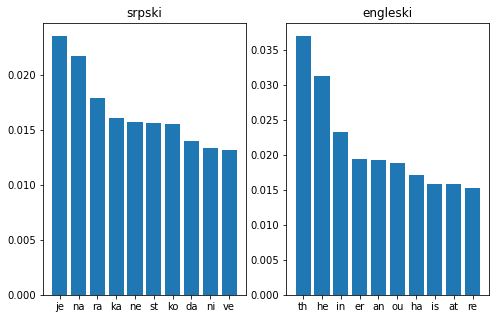

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# srpski
plt.subplot(1, 2, 1)
lab = list(map(lambda x: x[0], top_10_s))
freq = list(map(lambda x: x[1], top_10_s))
plt.bar(lab, freq)
plt.title("srpski")

# engleski
plt.subplot(1, 2, 2)
lab = list(map(lambda x: x[0], top_10_e))
freq = list(map(lambda x: x[1], top_10_e))
plt.bar(lab, freq)
plt.title("engleski")
          
plt.show()

## Klasifikator srpski - engleski

Algoritam klasifikatora koji se bazira na prebrojavanju najčešćih bigrama u tekstu i poređenju sa rečnicima bigrama po svakom od jezika:

1. prebroj $n$ najčešćih bigrama u tekstu čiji se jezik detektuje
2. svaki od $n$ bigrama poredi sa jezičkim profilima (rečnicima bigrama):
    - ako profil A ima veću vrednost za bigram $x$ od profila B, onda jezik A dobija jedan glas
    - ako su isti onda niko ne dobija glas 


3. tekst se klasifikuje u jezik sa više glasova

In [4]:
def detektuj_jezik(big_srp, big_eng, big_txt, n=30):
    """
    Detektuje da li je tekst reprezentivan recnikom bigrama
    pisan srpskim ili engleskim jezikom. 
    Vraca broj glasova za srpski i engleski jezik. 
    """
    
    srpski, engleski = 0, 0
    top_n = sorted(list(big_txt.items()), key=lambda x: x[1], reverse=True)[:n]
    for big, _ in top_n:
        s_tezina, e_tezina = big_srp.get(big, 0), big_eng.get(big, 0)
        if s_tezina > e_tezina:
            srpski += 1
        elif e_tezina > s_tezina:
            engleski += 1
    
    return srpski, engleski

# test
big_txt = recnik_bigrama(ucitaj("proba1.txt"))
s, e = detektuj_jezik(big_srp, big_eng, big_txt)
print(f"srpski: {s} engleski: {e}")

big_txt = recnik_bigrama(ucitaj("proba2.txt"))
s, e = detektuj_jezik(big_srp, big_eng, big_txt)
print(f"srpski: {s} engleski: {e}")

srpski: 26 engleski: 4
srpski: 7 engleski: 23


### Zavisnost broja glasova od broja najčeščih bigrama u posmatranom tekstu 

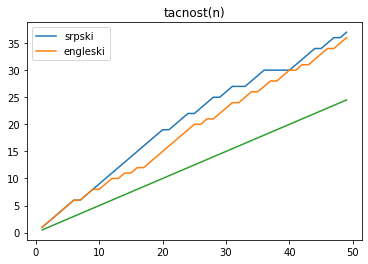

In [5]:
import numpy as np

big_1 = recnik_bigrama(ucitaj("proba1.txt"))
big_2 = recnik_bigrama(ucitaj("proba2.txt"))
glasovi_s, glasovi_e = [], []

for n in range(1, 50):
    s, e = detektuj_jezik(big_srp, big_eng, big_1, n)
    glasovi_s.append(s)
    
    s, e = detektuj_jezik(big_srp, big_eng, big_2, n)
    glasovi_e.append(e)
    
plt.plot(range(1, 50), glasovi_s, label="srpski")
plt.plot(range(1, 50), glasovi_e, label="engleski")
plt.plot(np.arange(1, 50), np.arange(1, 50)/2)
plt.title("tacnost(n)")
plt.legend()

plt.show()

### Testiranje za kratke tekstove

In [6]:
txt = input("unesite tekst ")
big_txt = recnik_bigrama(txt)
s, e = detektuj_jezik(big_srp, big_eng, big_txt, n=30)
print(f"srpski: {s} engleski: {e}")

unesite tekst Ja idem u bioskop
srpski: 8 engleski: 2
